This notebook contains code to train a fully connected neural network on MNIST using tf.contrib.learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

## Import the dataset

In [2]:
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


There are 55k examples in train, and 10k in eval. Limit the size to train faster. 

In [4]:
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

## Display some digits

In [5]:
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)    

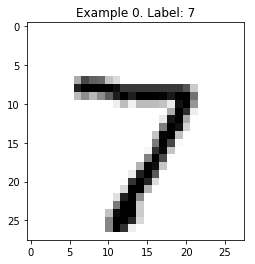

In [6]:
display(0)

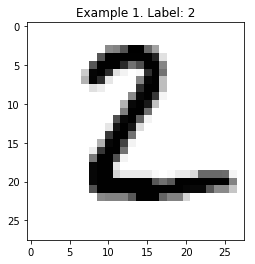

In [7]:
display(1)

These digits are clearly drawn. Here's one that's not.

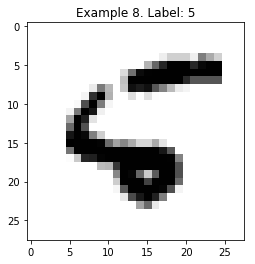

In [8]:
display(8)

Now let's take a look at how many features we have.

In [10]:
print(len(data[0]))

784


## Fit a Linear Classifier

Our goal here is to get about 90% accuracy with this simple classifier.

In [11]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

LinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x11b29dd30>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'optimizer': None, 'gradient_clip_norm': None, 'joint_weights': False})

## Evaluate accuracy

In [12]:
classifier.evaluate(test_data, test_labels)["accuracy"]

0.91369998

## Classify a few examples

We can make predictions on individual images as well. Note: the predict method accepts an array of samples as input, and returns a generator.

Predicted 7, Label: 7


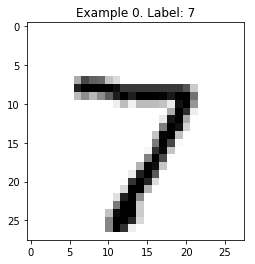

In [13]:
# here's one it gets right
print ("Predicted %d, Label: %d" % (list(classifier.predict(test_data[0:1]))[0], test_labels[0]))
display(0)

Predicted 6, Label: 5


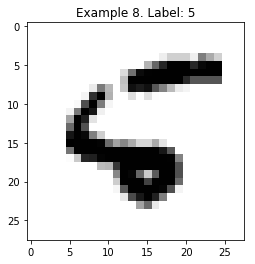

In [14]:
# and one it gets wrong
print ("Predicted %d, Label: %d" % (list(classifier.predict(test_data[8:9]))[0], test_labels[8]))
display(8)

## Visualize learned weights


Let's see if we can reproduce the pictures of the weights in the TensorFlow Basic MNSIT <a href="https://www.tensorflow.org/tutorials/mnist/beginners/index.html#mnist-for-ml-beginners">tutorial</a>. 

In [24]:
# TODO: need to fix the weights plot
# weights = classifier.weights_
# f, axes = plt.subplots(2, 5, figsize=(10,4))
# axes = axes.reshape(-1)
# for i in range(len(axes)):
#     a = axes[i]
#     a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
#     a.set_title(i)
#     a.set_xticks(()) # ticks be gone
#     a.set_yticks(())
# plt.show()

## Switch the estimator to a DNN

In [22]:
# Build 2 layer DNN with 128, 32 units respectively.

# Build 3 layer DNN with 10, 20, 10 units respectively.
dnn_classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[128, 32],
                                            n_classes=10,
                                            model_dir="/tmp/mnist_dnn")

# Fit model.

dnn_classifier.fit(data, labels, batch_size=100, steps=1000)




DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x114e9b208>, 'hidden_units': [128, 32], 'feature_columns': (_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x10e060730>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

## Accuracy improved!

In [23]:
dnn_classifier.evaluate(test_data, test_labels)["accuracy"]

0.94639999

# Next steps

* Try optimizing the input image such that softmax probability for 8 is maximized
* More reading
* Visualizing MNIST: http://colah.github.io/posts/2014-10-Visualizing-MNIST/
* More about linear classifiers: http://cs231n.github.io/linear-classify/